# Scenarios

To demonstrate the use of your simulator, you will produce a Jupyter
Notebook that performs the following scenarios, each consisting of a set
of tasks:

In [13]:
!ls -lR

.:
total 124
drwxr-sr-x 4 kzk8qq users  2048 Nov  9 15:06 Demo
drwxr-sr-x 2 kzk8qq users  2560 Nov  9 15:10 Demo.egg-info
-rw-r--r-- 1 kzk8qq users   555 Nov  7 19:49 dummycode.ipynb
-rw-r--r-- 1 kzk8qq users 17774 Oct 31 11:12 FinalProjectInstructions.ipynb
-rw-r--r-- 1 kzk8qq users  1086 Oct 31 14:14 LICENSE
-rw-r--r-- 1 kzk8qq users 13465 Oct 31 16:21 M08-HW-1-1.ipynb
-rw-r--r-- 1 kzk8qq users  9942 Nov  9 15:12 montecarlo_demo.ipynb
drwxr-sr-x 3 kzk8qq users  2560 Nov  9 14:53 montecarlo py storage
-rw-r--r-- 1 kzk8qq users  3130 Nov  7 18:31 montecarlo_test.py
-rw-r--r-- 1 kzk8qq users   667 Nov  7 19:46 montecarlo_test_results.txt
-rw-r--r-- 1 kzk8qq users   255 Oct 31 16:18 notes.txt
drwxr-sr-x 2 kzk8qq users   512 Oct 31 16:53 __pycache__
-rw-r--r-- 1 kzk8qq users    49 Oct 31 14:14 README.md
-rw-r--r-- 1 kzk8qq users   348 Nov  6 11:29 setup.py
-rw-r--r-- 1 kzk8qq users  9932 Nov  8 15:40 Untitled.ipynb

./Demo:
total 20
-rw-r--r-- 1 kzk8qq users   48 Nov  7 18:37 __init__.py


In [14]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/kzk8qq/Documents/MSDS/DS5100/kzk8qq_ds5100_montecarlo
  Attempting uninstall: Demo
    Found existing installation: Demo 0.1
    Uninstalling Demo-0.1:
      Successfully uninstalled Demo-0.1
  Running setup.py develop for Demo


## Scenario 1: A 2-headed Coin

1.  Create a fair coin (with faces $H$ and $T$) and one unfair coin in
    which one of the faces has a weight of $5$ and the others $1$.

2.  Play a game of $1000$ flips with two fair dice.

3.  Play another game (using a new Game object) of $1000$ flips, this
    time using two unfair dice and one fair die. For the second unfair
    die, you can use the same die object twice in the list of dice you
    pass to the Game object.

4.  For each game, use an Analyzer object to determine the raw frequency
    of jackpots — i.e. getting either all $H$s or all $T$s.

5.  For each analyzer, compute relative frequency as the number of
    jackpots over the total number of rolls.

6.  Show your results, comparing the two relative frequencies, in a
    simple bar chart.

Welcome to my MonteCarlo Final Project


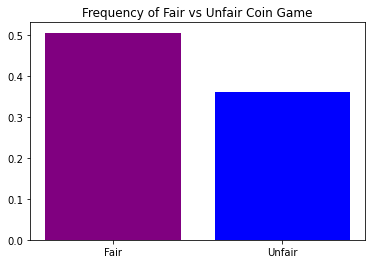

In [1]:
from Demo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##creating the coins
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

##two fair coins game
fair_game = Game([fair_coin, fair_coin])
fair_game.play(1000)

##two unfair coins and one fair coin
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_game.play(1000)

##raw frequencies of jackpots
fair_jackpots = Analyzer(fair_game).jackpot()
unfair_jackpots = Analyzer(unfair_game).jackpot()

##relative frequency 
frequency_fair = fair_jackpots / 1000
frequency_unfair = unfair_jackpots / 1000

##Scenario 1 bar plot
plt.bar(x = ['Fair','Unfair'], height = [frequency_fair,frequency_unfair], color=['purple', 'blue'])
plt.title('Frequency of Fair vs Unfair Coin Game')
plt.show()

## Scenario 2: A 6-sided Die

1.  Create three dice, each with six sides having the faces $1$ through
    $6$.

2.  Convert one die to an unfair one by weighting the face $6$ five
    times more than the other weights (i.e. it has weight of $5$ and the
    others a weight of $1$ each).

3.  Convert another die to be unfair by weighting the face $1$ five
    times more than the others.

4.  Play a game of $10000$ rolls with $5$ fair dice.

5.  Play a game of $10000$ rolls with $2$ unfair dice, one as defined in
    steps #2 and #3 respectively, and $3$ fair dice.

6.  For each game, use an Analyzer object to determine the relative
    frequency of jackpots and show your results, comparing the two
    relative frequencies, in a simple bar chart.

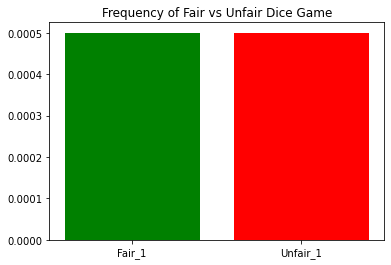

In [2]:
##create three dice
die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die_3 = Die(np.array([1, 2, 3, 4, 5, 6]))

##convert one die to an unfair 
unfair_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_1.change_weight(6, 5)

##convert another die to be unfair 
unfair_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_2.change_weight(1, 5)

##play 10000 with 5 fair dice 
fair_game_1 = Game([die_1, die_2, die_3, die_1, die_2])
fair_results = fair_game_1.play(10000)

##play 10000 with 2 unfair dice and 3 fair dice
unfair_game_1 = Game([unfair_1, unfair_2, die_1, die_2, die_3])
unfair_results = unfair_game_1.play(10000)

##Analyzer
fair_game_jackpots = Analyzer(fair_game_1).jackpot()
unfair_game_jackpots = Analyzer(unfair_game_1).jackpot()

frequency_fair_1 = fair_game_jackpots / 10000
frequency_unfair_1 = unfair_game_jackpots / 10000

plt.bar(x=['Fair_1', 'Unfair_1'], height=[frequency_fair_1, frequency_unfair_1], color=['green', 'red'])
plt.title('Frequency of Fair vs Unfair Dice Game')
plt.show()

## Scenario 3: The Roman Alphabet

1.  Create a “die” of letters from $A$ to $Z$ with weights based on
    their frequency of usage as found in the data file
    `data/english_letters.txt`. Use the frequencies (i.e. raw counts) as
    weights.

2.  Play a game involving $4$ of these dice with $1000$ rolls.

3.  Determine how many distinct permutations in your results are actual
    English words, based on the vocabulary found in
    `data/scrabble_words.txt`.

4.  Repeat steps #2 and #3 using $5$ dice and compare the results. Which
    word length generates a higher percentage of English words?

4 dice: 5.27% of permutations are English words.
5 dice: 0.90% of permutations are English words.
Game with 4 dice has a higher percentage of mutations


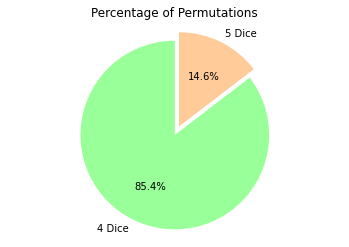

In [43]:

# Read english letters
letter_frequencies = read_letter_frequencies('data/english_letters.txt')

# frequency as weights
letter_dice = Die(np.array(list(letter_frequencies.keys())))

# weights based on frequencies
weights = np.array(list(letter_frequencies.values()))
for face, weight in zip(letter_dice._data.index, weights):
    letter_dice.change_weight(face, weight)

# 4 dice and 1000 rolls
dice_4 = [letter_dice] * 4
game_4 = Game(dice_4)
game_4.play(1000)

# Analyze 
analyze_4 = Analyzer(game_4)
perms_4 = analyze_4.permutation_count()

# Read Scrabble words
scrabble_words = set()
with open('data/scrabble_words.txt', 'r') as file:
    for line in file:
        scrabble_words.add(line.strip().upper())

# distinct permutations
english_4 = sum(word in scrabble_words for word in perms_4.index)

# Repeat
dice_5 = [letter_dice] * 5
game_5 = Game(dice_5)
game_5.play(1000)

analyze_5 = Analyzer(game_5)
perms_5 = analyze_5.permutation_count()

# Count  permutations
english_5 = sum(word in scrabble_words for word in perms_5.index)

# Compare 
percent_4 = (english_4 / len(perms_4)) * 100
percent_5 = (english_5 / len(perms_5)) * 100

print(f"4 dice: {percent_4:.2f}% of permutations are English words.")
print(f"5 dice: {percent_5:.2f}% of permutations are English words.")
print("Game with 4 dice has a higher percentage of mutations")

# Pie chart comparing percentages
labels = ['4 Dice', '5 Dice']
sizes = [percent_4, percent_5]
colors = ['#99ff99', '#ffcc99']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Permutations')
plt.show()